# library imports

In [1]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# import ha district polygons

In [ ]:
district_gpd ＝ pd.read_excel("district_map.xlsx", engine = "openpyxl")

# data clearning

In [47]:
def find_land_use(district, shape_gpd):
    """
    return cutout polygons, cutout area of intersecting zones and road zones, 
    as well as district area and total zoned/planned area within a district using zone map 
    provided by HK Govt
    
        Parameters:
            district (shapely.geometry.Polygon): polygon of a district
            shape_gpd (pd.DataFrame): dataframe containing planned zones 
            in shapely.geometry.Polygon inside a column named "geometry"
        
        Returns:
            cutouts ([shapely.geometry.Polygon]): list of polygons of road zones intersecting
            with district
            cutout.area (double): union area of cutouts
            district.area (double): district area
            zoned (Polygon): union polygon all planned zones within the district
    
    """
    cutouts = []
    cutout = shape_gpd["geometry"][0]
    zoned = shape_gpd["geometry"][0]
    for i in range(1,len(shape_gpd["geometry"])):
        if district.intersects(shape_gpd["geometry"][i]):
            intersect = district.intersection(shape_gpd["geometry"][i])
            zoned = zoned.union(intersect)
            if "Road" in shape_gpd["DESC_ENG"][i]:
                pg = shape_gpd["geometry"][i]
                intersect = district.intersection(pg)
                cutouts.append(intersect)
                cutout = cutout.union(intersect)
                
    # zoned_area = zoned.area
        
    return (cutouts, cutout.area, district.area, zoned)

ABD ABERDEEN Road over zoned area % 0.06547089284877966


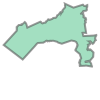

In [48]:
# print(district_gpd["Districtcode"][0], district_gpd["Districtname"][0])
i = 0
(cutouts, cutout_area, district_area, zoned) = find_land_use(district_gpd["geometry"][i], zone_gpd)
print(district_gpd["Districtcode"][i], 
      district_gpd["Districtname"][i],
      "Road over zoned area %",
      cutout_area / zoned.area)
district_gpd["geometry"][i]

In [49]:
df = district_gpd
road_over_zoned = []
for i in range(len(df)):
    # print(i)
    if i % 10 == 0:
        print(f"Finished {i} HA districts")
    cutouts, road, circle, zoned = find_land_use(df["geometry"][i], zone_gpd)
    
    # print(road / zoned, type(road_over_zoned))
    if zoned.area == 0 or road / zoned.area == 0:
        road_over_zoned.append(-1)
    else:
        road_over_zoned.append(road / zoned.area)


Finished 0 HA districts
Finished 10 HA districts
Finished 20 HA districts
Finished 30 HA districts
Finished 40 HA districts
Finished 50 HA districts
Finished 60 HA districts
Finished 70 HA districts
Finished 80 HA districts
Finished 90 HA districts
Finished 100 HA districts
Finished 110 HA districts


In [50]:
len(road_over_zoned)

118

# merging with HA district df

In [99]:
df = district_gpd
df = pd.concat([df, pd.DataFrame({"road_over_zoned": road_over_zoned})], axis = 1)
df["road_over_zoned"] = round(df["road_over_zoned"], 3)

In [100]:
# df = df[df["road_over_zoned"] != -1]

In [101]:
df = df.set_index("Districtname")

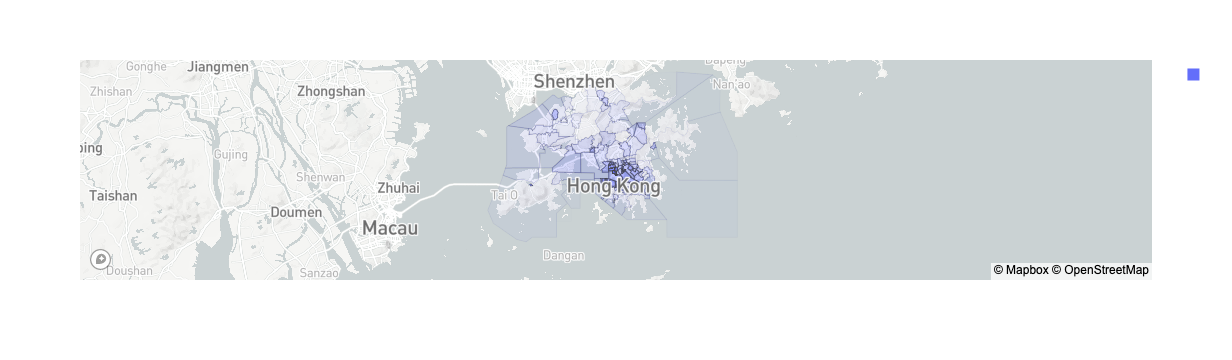

In [98]:
fig = px.choropleth_mapbox(df,
                           geojson=gpd.GeoSeries(df.geometry),
                           locations=df.index,
                           center={"lat": 22.3193, "lon": 114.1694},
                          mapbox_style="light",
                           hover_data = ["road_over_zoned"],
                          opacity = df.road_over_zoned / max(df.road_over_zoned))
fig.show()

In [55]:
df.to_excel("ha_district_road_over_zoned.xlsx")